## Introduction to Machine Learning

* You will compare the performance of machine learning models on a classification task to classify wine into quality categories (0-10), based on input features such as acidity, density, etc.

### Dataset


The training data contains 17 attributes. Those are:

   - `ID`: _unique identifier_
   - `type`: _wine-type_
   - `fixed_acidity`
   - `density_chlorides`	
   - `sulphates`	
   - `free_sulfur_dioxide`
   - `pH`	
   - `alcohol: alcohol content`
   - `Anonymized_attribute_1`
   - `Anonymized_attribute_2`
   - `Anonymized_attribute_3`
   - `Anonymized_attribute_4`	
   - `Anonymized_attribute_5`
   - `Anonymized_attribute_6`	
   - `Anonymized_attribute_7`
   - `Anonymized_attribute_8`
   - `quality`: The target attributed we need to predict. Values for this attribute are labels in the range [0 to 10], and represent the class corresponding to the wine quality. 


##### About the data files
* The data file are located under the `data` folder. The files are:

* Training samples that include the quality attribute: 
  * `train_data_named_attributes_1`
  * `train_data_named_attributes_2`
  * `train_data_named_attributes_3`
  * `train_data_named_attributes_4`
  * `train_data_named_attributes_5`
  * `Anonymized_attributes_train_data.csv`

* Training sample that does not include the quality attribute: 
  * `test_data_no_labels.csv`

* As you can see from the above, the training set is split into multiple files. The files `train_data_named_attributes_*.csv` all contain the same non-anonymized attributes. On the other hand, the file `Anonymized_attributes_train_data.csv` contains the anonymized attributes. The figure below illustrates the data splits across different files. The training data needs to be reconstructructed into a single file by concatenating the `train_data_named_attributes_*.csv` files and merging lines across the `train_data_named_attributes_*.csv` and `Anonymized_attributes_train_data.csv` that have the same `ID` value.

![](images/complete_training_data.png)


* Important: the dataset may contain missing values and extreme outliers or features that do not contribute any valuable information to the classification task at hand. As such, you will need to use your data wrangling and visualization skills to clean it up. Remember, machine learning models work on numerical data, therefore you need to make the necessary transformations.



### Instructions

* The goal is to classify the quality of wine as a categorical value in the range 0 to 10.
* You model does not need to use all the parameters. In fact, some of the parameters were intentionally added to introduce noise, which decreases the quality of the prediction.

* Use the following models from mostly found in `scikit-learn`. 
    
    1. KNN [Link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
    2. Logistic Regression [Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression)
    3. Random forest [Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
    4. XGboost [Link](https://xgboost.readthedocs.io/en/stable/install.html)
    
    
* Compare the models based on:

    1. Classification Accuracy
      * Which model provided the most accurate predictions
    2. Visualization of the confusion matrix heatmap
    

#### Libraries
You can use the following libraries

In [2]:
!pip -q install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


### Suggested Approach 

The overall steps suggested to complete the assignment are:
1. Load `Anonymized_attributes_train_data`, `train_data_named_attributes_*` files
2. Use pandas and python functions to merge all training files you want to train on.
3. Visualize the data to find correlated columns or columns that seem random
  * it's up to you to think of what it means for a column to be random, or if it will be helpful to the classification task

4. Write a function that wraps the ML algorithm (ex. KNN or logistic regression). The function should take raw data input, and return a series of predictions 
  * I suggest you start with KNN.
5. Perform 5-fold cross validation, and determine the most appropriate hyperparameters for each model on your data.
   * For example, if you start with KNN, Cross-validation will help you determine thecorrectt k (i.e., number of nearest neighbors) to use.
6. Evaluate on train, retrain on full train set, then submit test predictions for the `test_data_no_labels.csv`
  * Here, you simply need to run the function built in step 4 on the file `test_data_no_labels` on your choice of the best performing model among those fitted, i.e., KNN, logistic, Random forest and XGboost


-----

### Submission

* Submit 2 files
    1. a ```.ipynb``` of the last state of your work showing all outputs and visualization graphs 
    2. a ```.csv``` file containing an ID and test predictions from your best model. 
    
* use this code to have the right .csv file format for grading your predictions
    


```python
submission=pd.DataFrame(test['ID'])
best_model = Some_model(**params)
submission['quality'] = best_model.fit_predict(processed_test_data)
submission.to_csv('YOUR_UH_USER_ID.csv',index=False)
```

##### Part 1: Load Files

In [12]:
anonymized_attributes_train_data = pd.read_csv("data/Anonymized_attributes_train_data.csv")
train_data_1 = pd.read_csv("data/train_data_named_attributes_1.csv")
train_data_2 = pd.read_csv("data/train_data_named_attributes_2.csv")
train_data_3 = pd.read_csv("data/train_data_named_attributes_3.csv")
train_data_4 = pd.read_csv("data/train_data_named_attributes_4.csv")
train_data_5 = pd.read_csv("data/train_data_named_attributes_5.csv")

##### Part 2: Merge Data

In [13]:
data = pd.concat([train_data_1, train_data_2, train_data_3, train_data_4, train_data_5], ignore_index=True)

In [14]:
data = data.merge(anonymized_attributes_train_data, on="ID")
data.head()

,ID,type,fixed_acidity,alcohol,density,sulphates,free_sulfur_dioxide,pH,quality,Anonymized_attribute_1,Anonymized_attribute_2,Anonymized_attribute_3,Anonymized_attribute_4,Anonymized_attribute_5,Anonymized_attribute_6,Anonymized_attribute_7,Anonymized_attribute_8
0,3913,red,8.7,9.2,0.99623,1.17,12.0,3.00,5,0.780,0.51,0.11,1.70,1.665646,45.0,66.0,0.415
1,2009,red,7.2,9.5,0.99587,0.39,7.0,3.34,5,0.655,0.03,0.02,1.80,1.378465,45.0,12.0,0.078
2,3871,white,6.8,10.2,0.99358,0.59,7.0,2.96,5,0.210,0.62,0.58,6.40,1.301884,45.0,113.0,0.041
3,6198,red,7.1,9.4,0.99694,0.48,31.0,3.45,5,0.340,0.28,0.19,2.00,1.359320,45.0,68.0,0.082
4,1114,white,7.1,10.4,0.99587,0.59,32.0,3.31,6,0.200,0.31,0.68,6.85,1.359320,45.0,211.0,0.053


##### Part 3: Find Correlated Columns

In [15]:
data.iloc[:,2:].corr(method='kendall')

,fixed_acidity,alcohol,density,sulphates,free_sulfur_dioxide,pH,quality,Anonymized_attribute_1,Anonymized_attribute_2,Anonymized_attribute_3,Anonymized_attribute_4,Anonymized_attribute_5,Anonymized_attribute_6,Anonymized_attribute_7,Anonymized_attribute_8
fixed_acidity,1.000000,-0.076503,0.301200,0.156522,-0.169459,-0.170146,-0.067862,0.125231,0.186399,0.007205,-0.022827,1.000000,NaN,-0.148151,0.259020
alcohol,-0.076503,1.000000,-0.522559,0.009079,-0.127296,0.101938,0.355572,-0.017993,0.016126,-0.006713,-0.226007,-0.076383,NaN,-0.214672,-0.274230
density,0.301200,-0.522559,1.000000,0.185225,0.009490,0.005395,-0.256603,0.176330,0.033672,0.010292,0.384312,0.301054,NaN,0.059365,0.414281
sulphates,0.156522,0.009079,0.185225,1.000000,-0.146047,0.174870,0.025882,0.168436,0.022804,-0.002903,-0.092932,0.155576,NaN,-0.164964,0.258769
free_sulfur_dioxide,-0.169459,-0.127296,0.009490,-0.146047,1.000000,-0.118560,0.054874,-0.239357,0.088773,-0.005716,0.266028,-0.168549,NaN,0.554307,-0.172337
pH,-0.170146,0.101938,0.005395,0.174870,-0.118560,1.000000,0.024921,0.143683,-0.195789,-0.007528,-0.162873,-0.170037,NaN,-0.171235,0.110174
quality,-0.067862,0.355572,-0.256603,0.025882,0.054874,0.024921,1.000000,-0.199908,0.091372,-0.008381,-0.026611,-0.067410,NaN,-0.051143,-0.227501
Anonymized_attribute_1,0.125231,-0.017993,0.176330,0.168436,-0.239357,0.143683,-0.199908,1.000000,-0.213566,-0.006381,-0.049435,0.124396,NaN,-0.222916,0.287572
Anonymized_attribute_2,0.186399,0.016126,0.033672,0.022804,0.088773,-0.195789,0.091372,-0.213566,1.000000,-0.000285,0.050843,0.187071,NaN,0.114035,-0.059050
Anonymized_attribute_3,0.007205,-0.006713,0.010292,-0.002903,-0.005716,-0.007528,-0.008381,-0.006381,-0.000285,1.000000,0.021837,0.007244,NaN,0.007716,-0.000420


In [16]:
data.drop(axis=1, columns=["Anonymized_attribute_3", "Anonymized_attribute_6"], inplace=True)

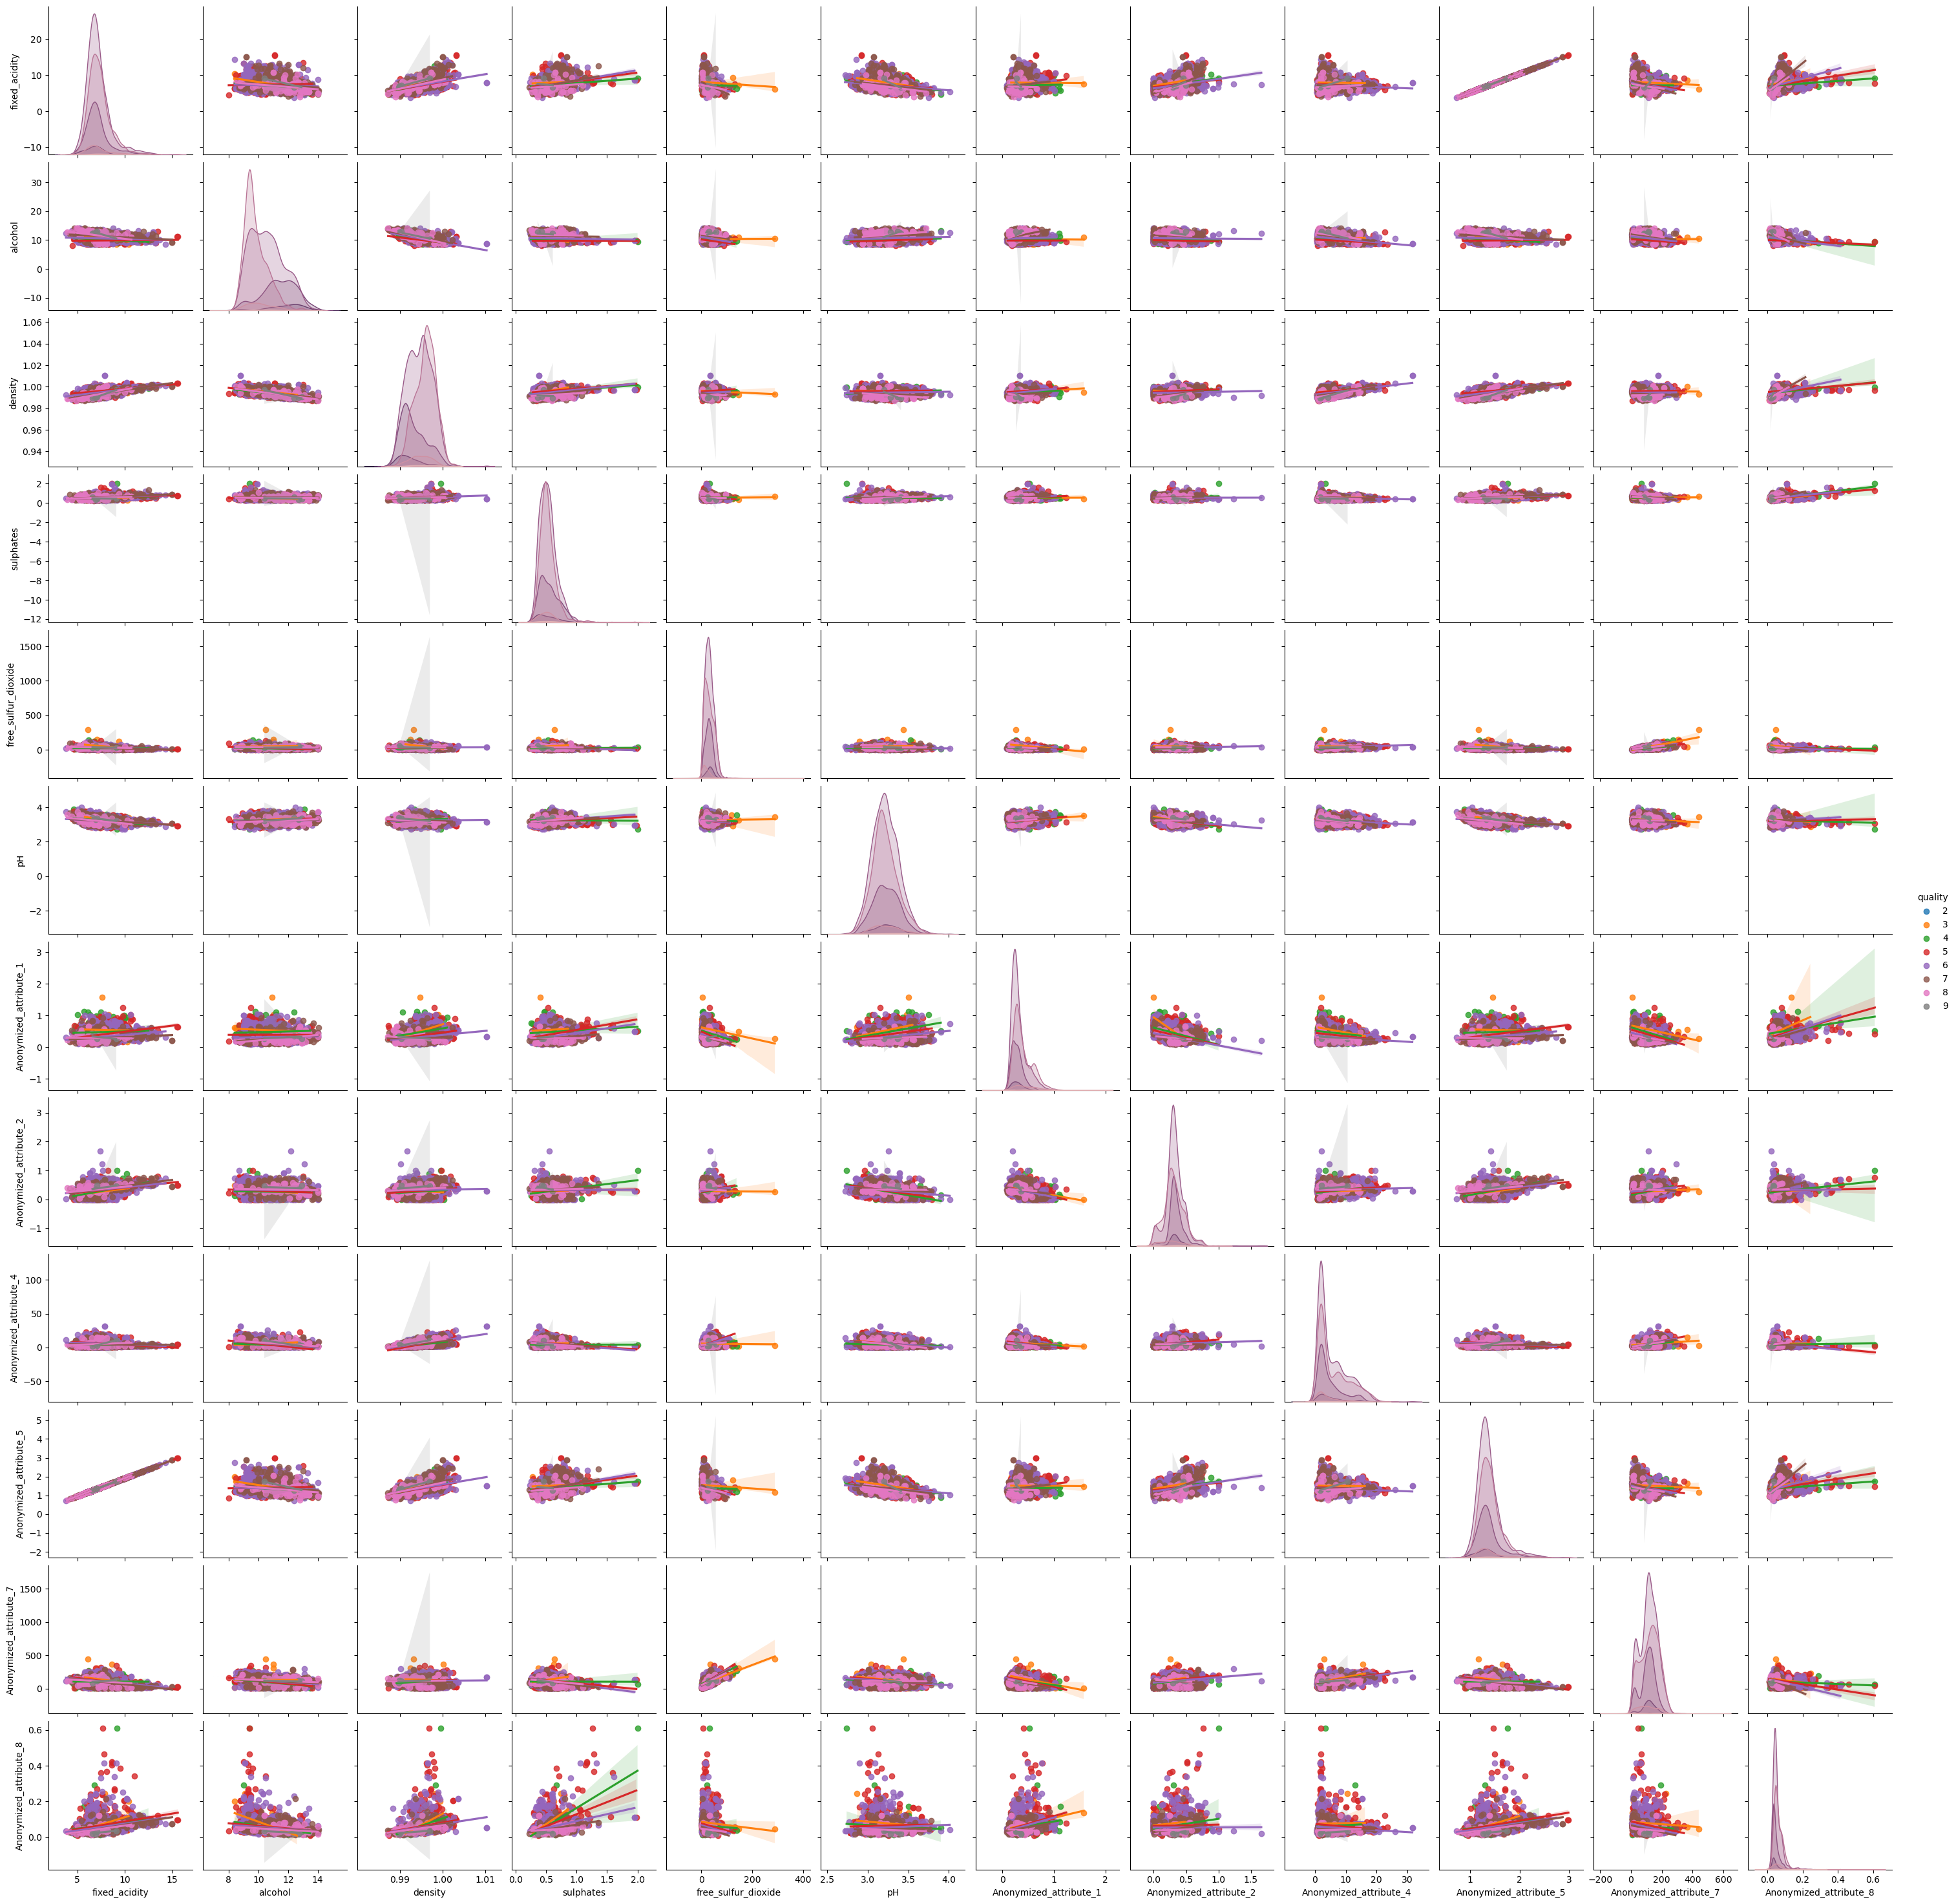

In [17]:
sns.pairplot(data.iloc[:,2:], hue='quality', kind="reg")

In [18]:
data.dropna(inplace=True)
X, Y = data.iloc[:, 2:-1], data['quality']
print(X.shape)
print(Y.shape)

(4517, 12)
(4517,)


In [19]:
# Split the data between train and test data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1950)
shuffle_index = np.random.permutation(2567)
X_train, Y_train = X_train.iloc[shuffle_index], Y_train.iloc[shuffle_index]

In [20]:
# Separate by Low, Medium, and High quality wine.

Y_train_low = (Y_train <= 4)
Y_train_medium = (Y_train <= 7) & (Y_train >= 5)
Y_train_high = Y_train >= 8

##### Part 4: Function that wraps the ML Algorithm

In [21]:
# Using KNN, compute the score for the tree types of wine quality.


score_low = compute_KNN(13, X_train, Y_train_low)
print("Low Quality Score:", score_low)
score_medium = compute_KNN(7, X_train, Y_train_medium)
print("Medium Quality Score:", score_medium)
score_high = compute_KNN(11, X_train, Y_train_high)
print("High Quality Score:", score_high)

Low Quality Score: 0.962991819244254
Medium Quality Score: 0.9345539540319439
High Quality Score: 0.9676665368134009


In [467]:
# Using RandomForest, compute the score for the tree types of wine quality.

def compute_RandomForest (n, x_train, y_train):
    rand_forest = RandomForestClassifier(n_estimators=n).fit(x_train, y_train)
    y_pred = rand_forest.predict(x_train)
    score = sum(y_pred == y_train)/len(x_train)
    return score

score_low = compute_RandomForest(100, X_train, Y_train_low)
print("Low Quality Score:", score_low)
score_medium = compute_RandomForest(100, X_train, Y_train_medium)
print("Medium Quality Score:", score_medium)
score_high = compute_RandomForest(100, X_train, Y_train_high)
print("High Quality Score:", score_high)

Low Quality Score: 1.0
Medium Quality Score: 1.0
High Quality Score: 1.0


In [22]:
# Using Logistic Regression, compute the score for the tree types of wine quality.

def compute_LogisticRegression (n, x_train, y_train):
    logistic_reg = LogisticRegression(random_state = n, C=1e5, solver='lbfgs', max_iter=2000).fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_train)
    score = sum(y_pred == y_train)/len(x_train)
    return score

score_low = compute_LogisticRegression(3, X_train, Y_train_low)
print("Low Quality Score:", score_low)
score_medium = compute_LogisticRegression(3, X_train, Y_train_medium)
print("Medium Quality Score:", score_medium)
score_high = compute_LogisticRegression(3, X_train, Y_train_high)
print("High Quality Score:", score_high)

Low Quality Score: 1.0
Medium Quality Score: 0.930268796260226
High Quality Score: 1.0


In [23]:
# Using XGB, compute the score for the tree types of wine quality.

def compute_XGB (n, x_train, y_train):
    xgbc = xgb.XGBClassifier(n_estimators = n).fit(x_train, y_train)
    y_pred = xgbc.predict(x_train)
    score = sum(y_pred == y_train)/len(x_train)
    return score

score_low = compute_XGB(100, X_train, Y_train_low)
print("Low Quality Score:", score_low)
score_medium = compute_XGB(100, X_train, Y_train_medium)
print("Medium Quality Score:", score_medium)
score_high = compute_XGB(100, X_train, Y_train_high)
print("High Quality Score:", score_high)

Low Quality Score: 1.0
Medium Quality Score: 1.0
High Quality Score: 1.0


##### Part 5: 5-Fold Cross Validation
* Find the best hyperparameters

In [46]:
# Using KNN Cross Validation, find the optimal K values.

x_axis = range(3, 31)

def KNN_crossValidation(x, y):
    scores_mean = []

    for k in x_axis :
        knn_cv = KNeighborsClassifier(n_neighbors=k)
        scores_cv = cross_val_score(knn_cv, x, y, cv=5, scoring='accuracy')
        scores_mean.append(scores_cv.mean())
    return scores_mean

Best K Value: 5


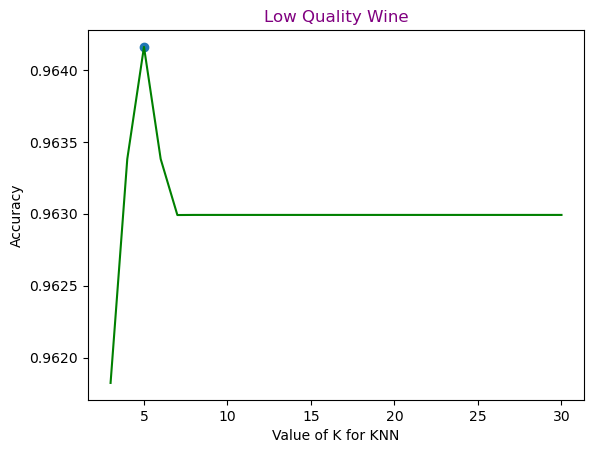

In [52]:
# Low Quality Wine
y_axis = KNN_crossValidation(X_train, Y_train_low)
best_low_K = y_axis.index(max(y_axis))+3

print("Best K Value:", best_low_K)

plt.plot(x_axis, y_axis, color="green")
plt.scatter(best_low_K , max(y_axis))
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('Low Quality Wine', color="purple")
plt.show()

Best K Value: 5


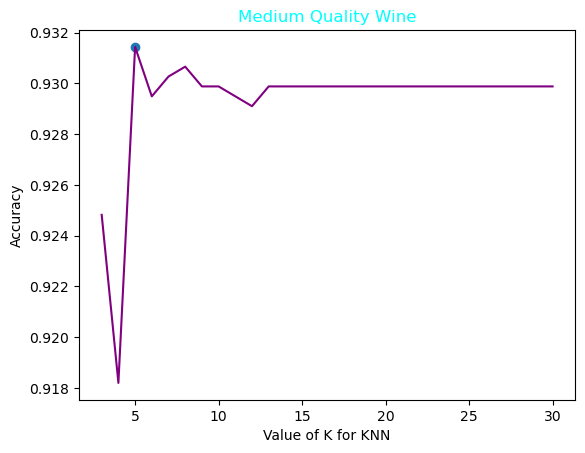

In [49]:
# Medium Quality Wine
y_axis = KNN_crossValidation(X_train, Y_train_medium)
best_medium_K = y_axis.index(max(y_axis))+3

print("Best K Value:", best_medium_K)

plt.plot(x_axis, y_axis, color="purple")
plt.scatter(best_medium_K, max(y_axis))
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('Medium Quality Wine', color="cyan")
plt.show()

Best K Value: 4


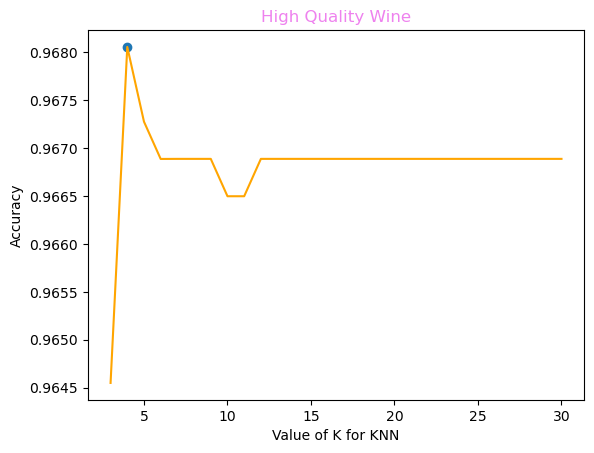

In [50]:
# High Quality Wine
y_axis = KNN_crossValidation(X_train, Y_train_high)
best_high_K = y_axis.index(max(y_axis))+3

print("Best K Value:", best_high_K)

plt.plot(x_axis, y_axis, color="orange")
plt.scatter(best_high_K, max(y_axis))
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('High Quality Wine', color="violet")
plt.show()

In [32]:
# Using Random Forest Grid Search Cross Validation to find the best hyperparameters

def randomForest_CV (x, y):
    params_rf = [{'n_estimators':[3, 9, 27, 50, 81], 'max_features': [2, 3, 4, 5, 7, 9, 11]}]
    forest_reg = RandomForestClassifier()
    search_rf = GridSearchCV(forest_reg, param_grid=params_rf, cv=5, scoring = 'accuracy')
    search_rf.fit(x, y)
    return search_rf.best_params_

In [33]:
print("Low Quality Hyperparameters:", randomForest_CV (X_train, Y_train_low))
print("Medium Quality Hyperparameters:", randomForest_CV (X_train, Y_train_medium))
print("High Quality Hyperparameters:", randomForest_CV (X_train, Y_train_high))

Low Quality Hyperparameters: {'max_features': 2, 'n_estimators': 27}
Medium Quality Hyperparameters: {'max_features': 3, 'n_estimators': 27}
High Quality Hyperparameters: {'max_features': 2, 'n_estimators': 50}


In [34]:
# Using Logistic Regression Grid Search Cross Validation to find the best hyperparameters

def logisticRegression_CV (x, y):
    params_lr = [{'solver':['newton-cg', 'lbfgs', 'liblinear'], 'max_iter': [2000, 4000, 3000]}]
    lg_grid = LogisticRegression()
    search_lr = GridSearchCV(lg_grid, param_grid=params_lr, cv=5, scoring = 'accuracy')
    search_lr.fit(x, y)
    return search_lr.best_params_

In [35]:
print("Low Quality Hyperparameters:", logisticRegression_CV (X_train, Y_train_low))
print("Medium Quality Hyperparameters:", logisticRegression_CV (X_train, Y_train_medium))
print("High Quality Hyperparameters:", logisticRegression_CV(X_train, Y_train_high))

Low Quality Hyperparameters: {'max_iter': 2000, 'solver': 'newton-cg'}
Medium Quality Hyperparameters: {'max_iter': 2000, 'solver': 'newton-cg'}
High Quality Hyperparameters: {'max_iter': 2000, 'solver': 'newton-cg'}


In [38]:
# Using XGB Grid Search Cross Validation to find the best hyperparameters

def XGB_CV (x, y):
    params_xgb = [{'n_estimators':[3, 9, 27, 50, 81, 100], 'max_depth': [1, 3, 5, 7, 9, 11]}]
    xgb_grid = xgb.XGBClassifier()
    search_xgb = GridSearchCV(xgb_grid, param_grid=params_xgb, cv=5, scoring = 'accuracy')
    search_xgb.fit(x, y)
    return search_xgb.best_params_

In [39]:
print("Low Quality Hyperparameters:", XGB_CV (X_train, Y_train_low))
print("Medium Quality Hyperparameters:", XGB_CV (X_train, Y_train_medium))
print("High Quality Hyperparameters:", XGB_CV (X_train, Y_train_high))

Low Quality Hyperparameters: {'max_depth': 1, 'n_estimators': 3}
Medium Quality Hyperparameters: {'max_depth': 1, 'n_estimators': 9}
High Quality Hyperparameters: {'max_depth': 1, 'n_estimators': 3}


##### Part 6: Retrain with Optimal Hyperparameters and Confusion Matrix

In [56]:
# KNN: Optimal K value

print("Low Quality Score:", compute_KNN(5, X_train, Y_train_low))
print("Medium Quality Score :", compute_KNN(5, X_train, Y_train_medium))
print("High Quality Score:", compute_KNN(4, X_train, Y_train_high))

Low Quality Score: 0.9661082976236852
Medium Quality Score : 0.9368913128165174
High Quality Score: 0.9703934553954032


<Axes: >

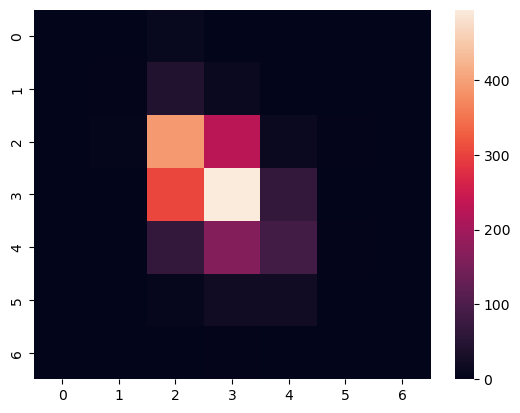

In [57]:
alldata = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
pred = alldata.predict(X_test)

sns.heatmap(confusion_matrix(Y_test, pred))

In [65]:
# XGBC: Optimal n_estimator and max_depth value

def optimal_XGB (n, depth, x_train, y_train):
    xgbc = xgb.XGBClassifier(n_estimators = n, max_depth=depth).fit(x_train, y_train)
    y_pred = xgbc.predict(x_train)
    score = sum(y_pred == y_train)/len(x_train)
    return score

In [66]:
print("Low Quality Score:", optimal_XGB(3, 1, X_train, Y_train_low))
print("Medium Quality Score :", optimal_XGB(9, 1, X_train, Y_train_medium))
print("High Quality Score:", optimal_XGB(3, 1, X_train, Y_train_high))

Low Quality Score: 1.0
Medium Quality Score : 1.0
High Quality Score: 1.0


<Axes: >

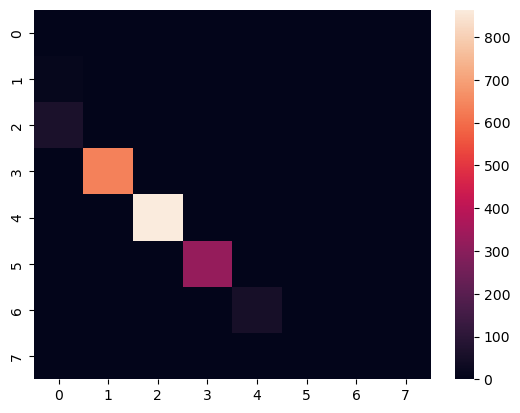

In [67]:
le = LabelEncoder()
temp = le.fit_transform(Y_train)

xgbc_alldata = xgb.XGBClassifier(n_estimators=3, max_depth=1).fit(X_train, temp)
pred = xgbc_alldata.predict(X_test)

sns.heatmap(confusion_matrix(Y_test, pred))

In [69]:
# Logistic Regression: Optimal solver and max_iter value

def optimal_logistic (n, slv, m_iter, x_train, y_train):
    logistic_reg = LogisticRegression(random_state = n, C=1e5, solver=slv, max_iter=m_iter).fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_train)
    score = sum(y_pred == y_train)/len(x_train)
    return score

In [71]:
print("Low Quality Score:", optimal_logistic(3, 'newton-cg', 2000, X_train, Y_train_low))
print("Medium Quality Score :", optimal_logistic(3, 'newton-cg', 2000, X_train, Y_train_medium))
print("High Quality Score:", optimal_logistic(3, 'newton-cg', 2000, X_train, Y_train_high))

Low Quality Score: 1.0
Medium Quality Score : 0.929879236462797
High Quality Score: 1.0


<Axes: >

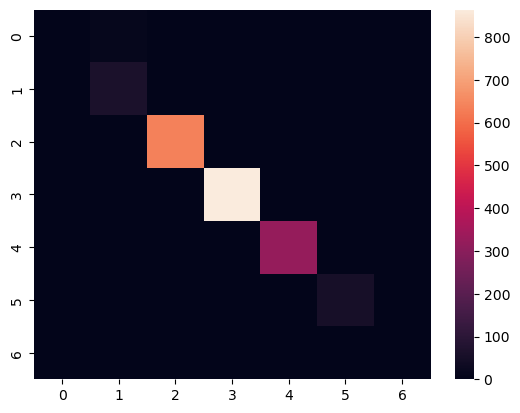

In [72]:
alldata = LogisticRegression(solver='newton-cg', max_iter=2000).fit(X_train, Y_train)
pred = alldata.predict(X_test)

sns.heatmap(confusion_matrix(Y_test, pred))

In [73]:
# Random Forest: Optimal solver and max_iter value

def optimal_randomforest (n, max_f, x_train, y_train):
    rand_forest = RandomForestClassifier(max_features=max_f, n_estimators=n).fit(x_train, y_train)
    y_pred = rand_forest.predict(x_train)
    score = sum(y_pred == y_train)/len(x_train)
    return score

In [74]:
print("Low Quality Hyperparameters:", optimal_randomforest (9, 2, X_train, Y_train_low))
print("Medium Quality Hyperparameters:", optimal_randomforest(27, 3, X_train, Y_train_medium))
print("High Quality Hyperparameters:", optimal_randomforest(9, 2, X_train, Y_train_high))

Low Quality Hyperparameters: 1.0
Medium Quality Hyperparameters: 1.0
High Quality Hyperparameters: 1.0


<Axes: >

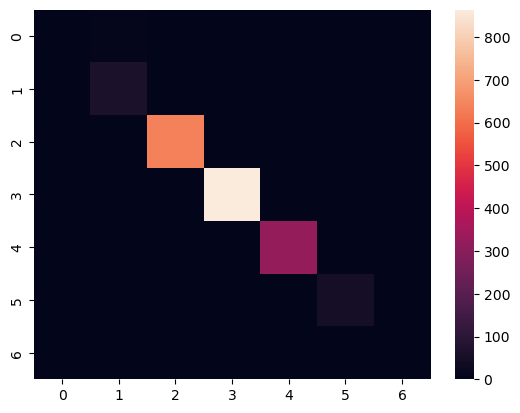

In [75]:
alldata = RandomForestClassifier(max_features=3, n_estimators=27).fit(X_train, Y_train)
pred = alldata.predict(X_test)

sns.heatmap(confusion_matrix(Y_test, pred))

##### 6.2 Submission

In [76]:
test = pd.read_csv("data/test_data_no_labels.csv")

In [77]:
submission=pd.DataFrame(test['ID'])
best_model = RandomForestClassifier(max_features=3, n_estimators=27).fit(X_train, Y_train)
submission['quality'] = best_model.predict(X_test)
submission.to_csv('acoa.csv',index=False)

In [78]:
submission.head(8)

,ID,quality
0,577,6
1,377,6
2,3419,5
3,4816,7
4,3551,6
5,2,5
6,2750,6
7,5774,6
